In [56]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.corpus import PlaintextCorpusReader
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from nltk.tokenize import RegexpTokenizer
from matplotlib import pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df = pd.read_csv("moviereviewDATA_Sentiment_LabelAtEND.csv")

In [18]:
#Combine all text to a single column
#separate the label to different column
df['Combined_text'] = df[df.columns[0:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1) #combines Text
df['Label'] = df['Combined_text'].apply(lambda x : x.split()[-1]) # Take the last word
df['Combined_text']= df['Combined_text'].apply(lambda x : ' '.join(x.split(' ')[:-1])) #Remove the last word
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df['Label'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Label']),axis=1)
df = df[['Combined_text', 'Label']]

###Wordclouds - before cleaning



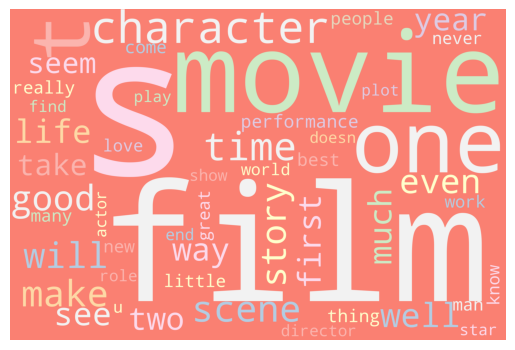

In [6]:
df_neg_bc = df[df['Label'] == ' pos']
text = " ".join(cat for cat in df_neg_bc.Combined_text)
# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    max_words=50
    ).generate(text)
#Display Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

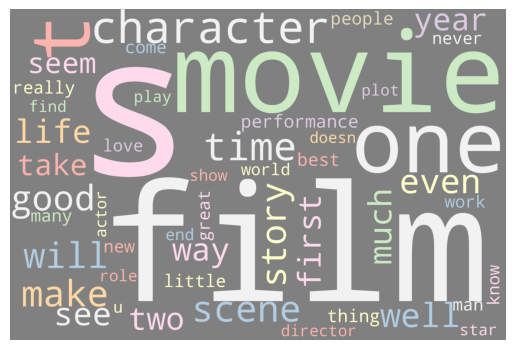

In [7]:
df_pos_bc = df[df['Label'] == ' pos']
text = " ".join(cat for cat in df_pos_bc.Combined_text)
# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="grey",
    colormap="Pastel1",
    collocations=False,
    max_words=50
    ).generate(text)
#Display Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [19]:
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df['Combined_text'] = df.apply(lambda row: row['Combined_text'].lower(),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub(r"http\S+","", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Combined_text']),axis=1)
df['Combined_text'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Combined_text']),axis=1)
df['Combined_text']=df['Combined_text'].str.findall('\w{4,}').str.join(' ')
df = df[['Combined_text', 'Label']]

In [20]:
#More Cleaning
#Removing Punctuation
def remove_punctuation(text):
  for element in text:
    if element in string.punctuation:
      text = text.replace(element, "")
  return text
df['Combined_text'] = df['Combined_text'].apply(remove_punctuation)
#removing stopwords
stop =stopwords.words('english')
df['Combined_text'] = df['Combined_text'].apply( lambda x : " ".join([word for word in x.split() if word not in (stop)]))


In [21]:
df

,Combined_text,Label
0,plot teen couples church party drink drive acc...,neg
1,happy bastard quick movie review damn head sta...,neg
2,movies like make jaded movie viewer thankful i...,neg
3,quest camelot warner bros first feature length...,neg
4,synopsis mentally unstable undergoing psychoth...,neg
...,...,...
1995,movie everything movie funny dramatic interest...,pos
1996,richard gere commanding actor always great fil...,pos
1997,glory starring matthew broderick denzel washin...,pos
1998,steven spielberg second epic film world unques...,pos


###World clouds - after cleaning

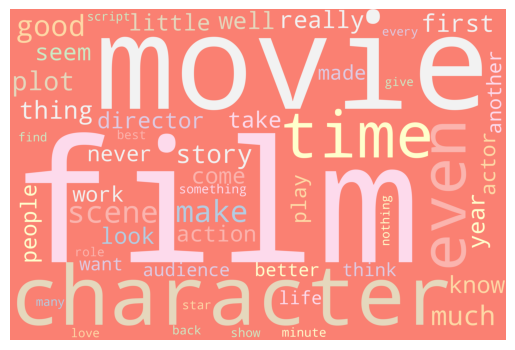

In [11]:
df_neg_ac = df[df['Label'] == ' neg']
text = " ".join(cat for cat in df_neg_ac.Combined_text)
# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    max_words=50
    ).generate(text)
#Display Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

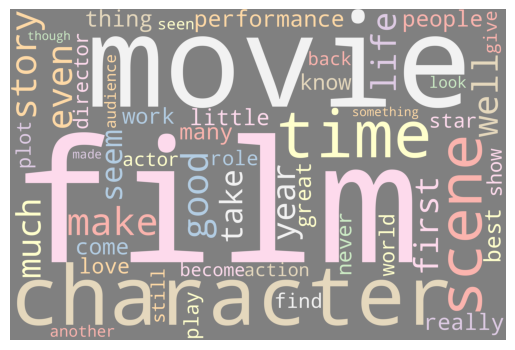

In [12]:
df_pos_ac = df[df['Label'] == ' pos']
text = " ".join(cat for cat in df_pos_ac.Combined_text)
# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="grey",
    colormap="Pastel1",
    collocations=False,
    max_words=50
    ).generate(text)
#Display Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###Dataframe with lemming

In [22]:
#Lemmatizer Function
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [23]:
df['label'] = df['Label'].apply(lambda x : x.lstrip())

In [30]:
df.rename(columns = {'Combined_text' : 'Review'}, inplace = True)
df.drop(columns = ['Label'], axis =1 , inplace = True)

In [28]:
labels =  df['label']

In [31]:
df

,Review,label
0,plot teen couples church party drink drive acc...,neg
1,happy bastard quick movie review damn head sta...,neg
2,movies like make jaded movie viewer thankful i...,neg
3,quest camelot warner bros first feature length...,neg
4,synopsis mentally unstable undergoing psychoth...,neg
...,...,...
1995,movie everything movie funny dramatic interest...,pos
1996,richard gere commanding actor always great fil...,pos
1997,glory starring matthew broderick denzel washin...,pos
1998,steven spielberg second epic film world unques...,pos


In [32]:
CVL = CountVectorizer(tokenizer= tokenize)
Mat1 = CVL.fit_transform(df['Review'])
df1 = pd.DataFrame(data = Mat1.toarray(), columns = CVL.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
df1

,0009f,1000,10000,100m,10th,1138,11th,1272,1298,12th,...,zuko,zukovsky,zulu,zundel,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Dataframe with 30 features

In [34]:
CVF = CountVectorizer(max_features = 30)
Mat2 = CVF.fit_transform(df['Review'])
df2 = pd.DataFrame(data = Mat2.toarray(), columns = CVF.get_feature_names_out())
df2

,also,best,character,characters,could,director,even,film,films,first,...,never,people,plot,really,scene,scenes,story,time,well,would
0,1,0,2,1,0,1,3,6,2,0,...,0,1,1,2,0,2,0,0,1,1
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2,0,0,1,1,1,0
2,0,1,0,3,0,0,4,8,1,1,...,0,0,2,3,0,0,0,1,0,1
3,0,1,0,1,0,0,2,1,0,1,...,0,0,0,0,0,1,1,1,0,0
4,1,0,1,0,0,0,4,2,1,0,...,1,1,1,1,0,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,6,0,0,3,0,1,4,2,0,...,0,0,0,1,0,0,0,4,4,0
1996,0,0,0,0,0,0,2,0,1,0,...,0,1,0,0,2,0,2,1,1,0
1997,1,0,1,0,1,1,3,8,1,3,...,2,0,0,1,2,2,2,2,2,0
1998,2,0,1,1,0,0,1,15,2,3,...,0,0,1,0,0,0,0,1,0,0


##Part 3: Latent Dirichlet Allocation

In [47]:
#Dataframe 1
vocab = CVL.get_feature_names_out()
#Create the LDA Model
lda_model = LatentDirichletAllocation(n_components= 4, learning_method = "online", max_iter=100, random_state =2 )
X_topics = lda_model.fit_transform(df1)
#Get topic words
topic_words = lda_model.components_

In [ ]:
!pip install pyLDAvis

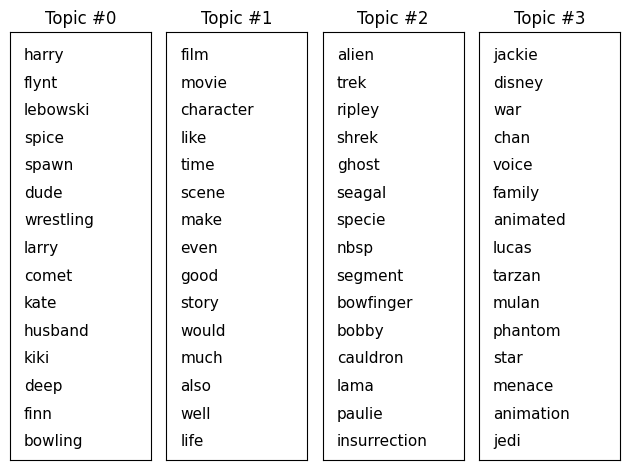

In [48]:
NUM_TOPICS= 4
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 14

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=11)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [53]:
#Dataframe 1
vocab = CVF.get_feature_names_out()
#Create the LDA Model
lda_model = LatentDirichletAllocation(n_components= 3, learning_method = "online", max_iter=100, random_state =2 )
X_topics = lda_model.fit_transform(df2)
#Get topic words
topic_words = lda_model.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


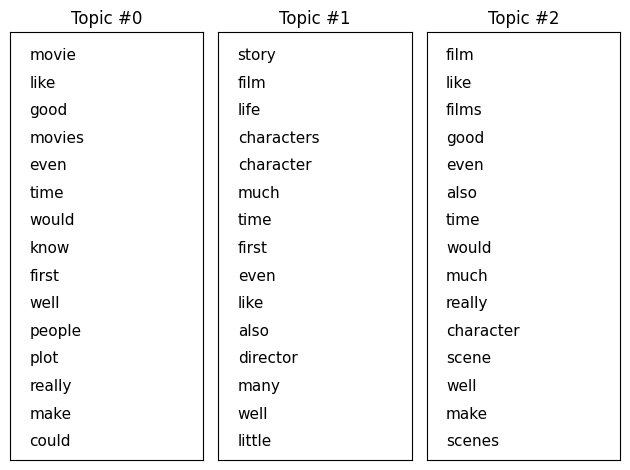

In [54]:
NUM_TOPICS= 3
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 14

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=11)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

##Clustering

In [37]:
#Clustering for n = 2
kmeans_5 = KMeans(n_clusters=2)
kmeans_5.fit(df2)
clusters_5 = kmeans_5.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
#Reducing Dimensionality for n = 2
pca = PCA(n_components=2, random_state=2)
pca_vecs = pca.fit_transform(df2.values.tolist())
a0 = pca_vecs[:, 0]
a1 = pca_vecs[:, 1]

In [40]:
df3 =df2

In [41]:
df3['cluster_5'] = clusters_5
df3['a0_5'] = a0
df3['a1_5'] = a1

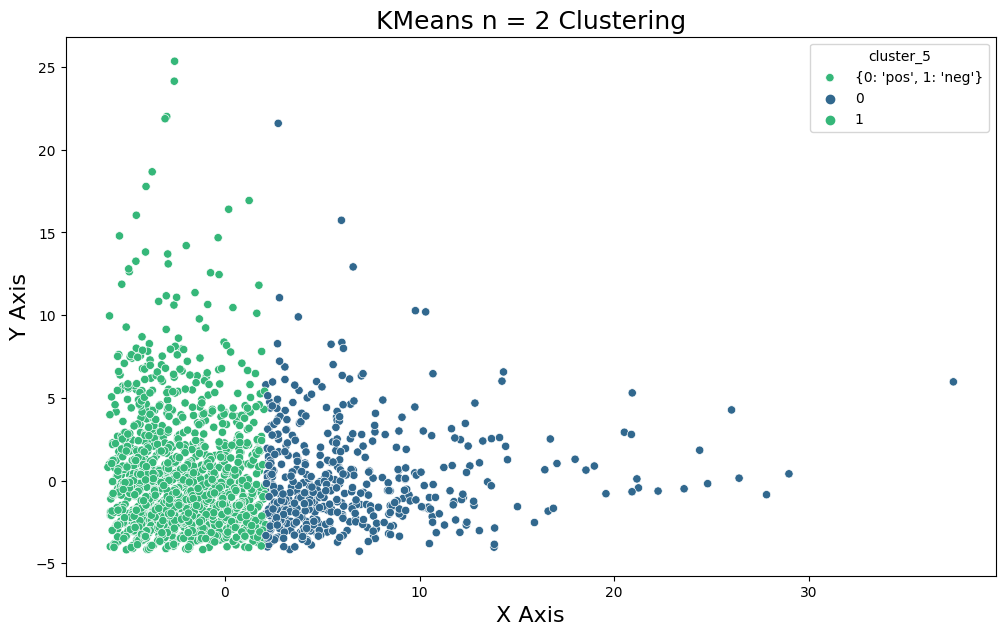

In [48]:
#Plotting Clusters for n = 5
plt.figure(figsize=(12, 7))
plt.title("KMeans n = 2 Clustering", fontdict={"fontsize": 18})
plt.xlabel("X Axis", fontdict={"fontsize": 16})
plt.ylabel("Y Axis", fontdict={"fontsize": 16})
sns.scatterplot(data=df3, x='a0_5', y='a1_5', hue='cluster_5', palette="viridis", label = {0 :'pos', 1: 'neg'})
plt.show()

##Part 6: Naïve Bayes, Decision Trees, and SVMs

In [50]:
X = df['Review']
y = df['label']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [52]:
#Convert trainig text to document term matrix
vectorizer  = CountVectorizer()
vectorizer.fit(X_train)
train_dtm = vectorizer.transform(X_train)

In [53]:
#Transform testing data into document term matrix using fitted vocabulary
test_dtm = vectorizer.transform(X_test)

In [54]:
#train dataframe
train_dtm_df = pd.DataFrame(train_dtm.toarray(), columns = vectorizer.get_feature_names_out())
train_dtm_df

,0009f,1000,10000,100m,10th,1138,11th,1272,1298,12th,...,zucker,zuehlke,zuko,zukovsky,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#test Dataframe
test_dtm_df = pd.DataFrame(test_dtm.toarray(), columns = vectorizer.get_feature_names_out())
test_dtm_df

,0009f,1000,10000,100m,10th,1138,11th,1272,1298,12th,...,zucker,zuehlke,zuko,zukovsky,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Naive Bayes

In [57]:
nb = BernoulliNB()
nb.fit(train_dtm,y_train)

BernoulliNB()

In [58]:
y_pred = nb.predict(test_dtm)

In [59]:
acc_nb = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy :", np.round(acc_nb*100,2),"%")

Model Accuracy : 78.25 %


In [60]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred)

In [62]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm1 = pd.DataFrame(cm1,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])

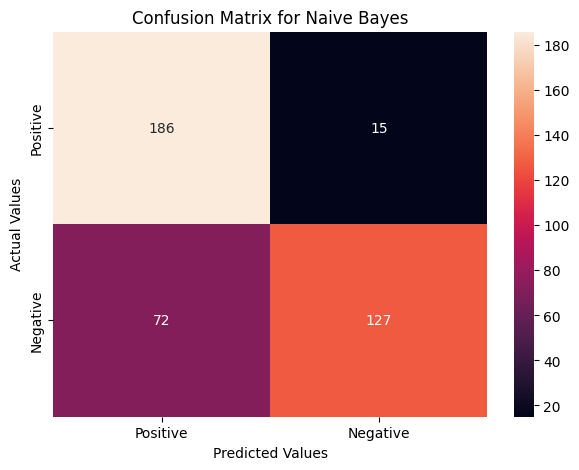

In [63]:
#Plotting the matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm1, annot=True, fmt='g')
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##DT

In [78]:
tree1 = tree.DecisionTreeClassifier()
tree1.fit(train_dtm, y_train)

DecisionTreeClassifier()

In [79]:
y_pred_1 = tree1.predict(test_dtm)

In [80]:
acc_tree = metrics.accuracy_score(y_test, y_pred_1)

In [81]:
print("Model Accuracy:", np.round(acc_tree*100, 2), "%")

Model Accuracy: 61.25 %


In [82]:
#Confusion Matrix
cm2 = confusion_matrix(y_test,y_pred_1)

In [83]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2 = pd.DataFrame(cm2,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])

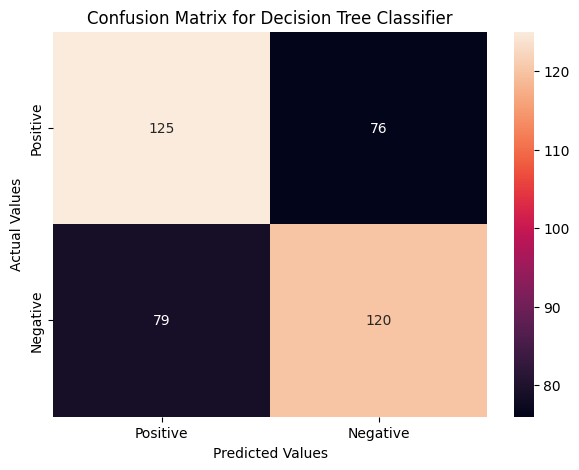

In [84]:
#Plotting
plt.figure(figsize=(7,5))
sns.heatmap(cm2, annot =True, fmt = 'g')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [85]:
tree2 = tree.DecisionTreeClassifier(max_depth = 5)
tree2.fit(train_dtm, y_train)

DecisionTreeClassifier(max_depth=5)

In [86]:
y_pred_2 = tree2.predict(test_dtm)

In [87]:
acc_tree2 = metrics.accuracy_score(y_test, y_pred_2)
print("Model Accuracy:", np.round(acc_tree2*100, 2), "%")

Model Accuracy: 62.75 %


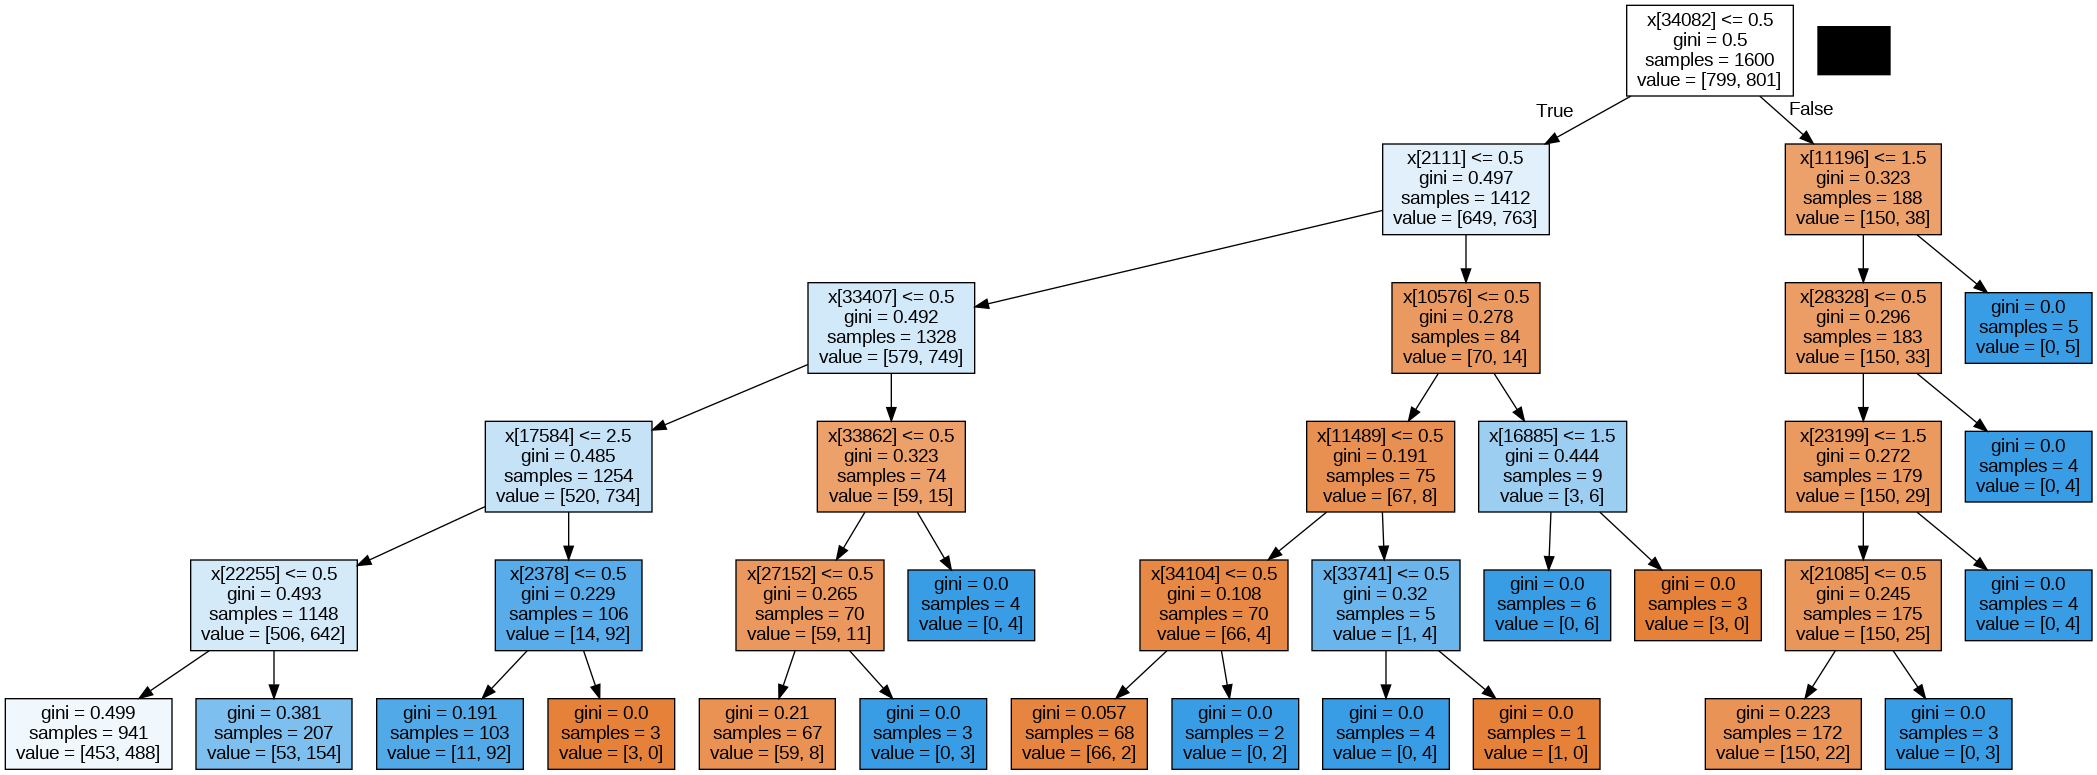

In [88]:
#Plotting Tree2 
dot_data1=tree.export_graphviz(tree2, out_file=None,filled=True) #filled = it will fill colors as per the conditon for the target variable = collection
graph2=pydotplus.graph_from_dot_data(dot_data1)
Image(graph2.create_png())

##SVM

In [89]:
# Linear Kernel
suppl = SVC(kernel = "linear")
suppl.fit(train_dtm, y_train)
y2_predl = suppl.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_predl)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 85.5 %


In [90]:
#Confusion Matrix for linear Kernel
cml = confusion_matrix(y2_predl,y_test)
cml_df = pd.DataFrame(cml, 
                   index = ['Positive','Negative'], 
                   columns = ['Positive','Negative'] )

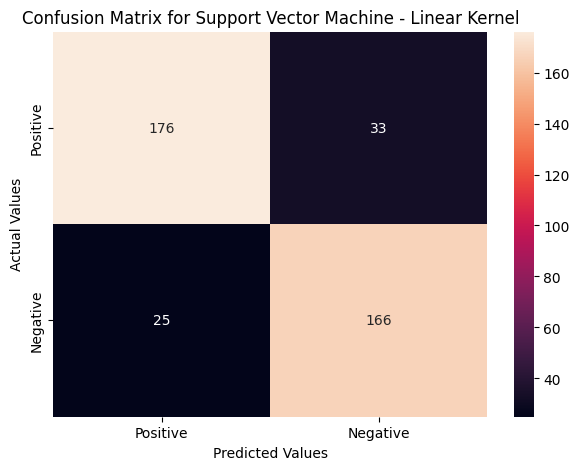

In [91]:
plt.figure(figsize =(7,5))
sns.heatmap(cml_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - Linear Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [92]:
# Sigmoid Kernel
supps = SVC(kernel = "sigmoid")
supps.fit(train_dtm, y_train)
y2_preds = supps.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_preds)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 79.0 %


In [93]:
#Confusion Matrix for Sigmoid Kernel
cms = confusion_matrix(y2_preds,y_test)
cms_df = pd.DataFrame(cms, 
                   index = ['Positive','Negative'], 
                   columns = ['Positive','Negative'] )

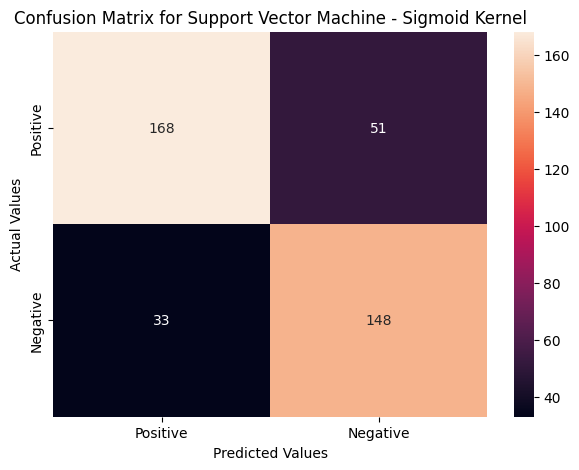

In [94]:
plt.figure(figsize =(7,5))
sns.heatmap(cms_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - Sigmoid Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [95]:
# RBF  Kernel
suppr = SVC(kernel = "rbf")
suppr.fit(train_dtm, y_train)
y2_predr = suppr.predict(test_dtm)
acc_svm = metrics.accuracy_score(y_test, y2_predr)
print("Model Accuracy:", np.round(acc_svm*100, 2), "%")

Model Accuracy: 81.75 %


In [97]:
#Confusion Matrix for rbf Kernel
cmr = confusion_matrix(y2_predr,y_test)
cmr_df = pd.DataFrame(cmr, 
                   index = ['Positive','Negative'], 
                   columns = ['Positive','Negative'] )

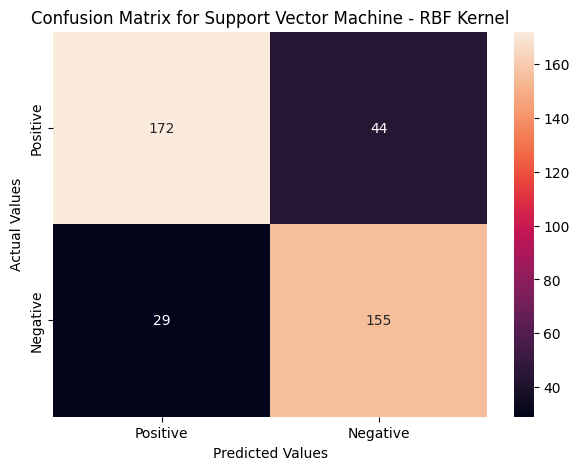

In [98]:
plt.figure(figsize =(7,5))
sns.heatmap(cmr_df, annot= True , fmt='g')
plt.title("Confusion Matrix for Support Vector Machine - RBF Kernel")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

##DATAFRAME 2

In [102]:
df2.drop(columns = ['cluster_5',	'a0_5',	'a1_5'], axis = 1, inplace = True)

In [105]:
df2['label'] = labels

In [107]:
df2.sample(frac= 1)

,also,best,character,characters,could,director,even,film,films,first,...,people,plot,really,scene,scenes,story,time,well,would,label
938,1,0,3,0,0,0,3,5,2,0,...,2,2,1,2,0,0,0,0,1,neg
622,2,0,0,2,2,2,2,16,0,0,...,0,1,0,1,1,0,1,1,9,neg
1922,4,0,3,1,1,1,0,21,4,2,...,1,2,2,1,2,1,1,3,2,pos
247,1,0,1,0,0,1,1,2,1,1,...,0,0,1,0,1,0,1,0,1,neg
1542,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,2,0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,2,1,0,0,0,0,2,0,0,0,...,3,0,0,0,0,0,7,1,0,neg
1831,1,2,0,0,0,0,1,13,0,0,...,2,0,3,0,0,1,2,0,1,pos
4,1,0,1,0,0,0,4,2,1,0,...,1,1,1,0,1,3,2,0,0,neg
1136,0,2,4,1,1,0,3,0,0,0,...,2,0,1,0,0,0,0,2,1,pos


In [108]:
#Dataframe2
X2 = df2.loc[:, df2.columns != 'label']
y2 = df2['label']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=3)

DATAFRAME 2
Model Accuracy : 62.83 %


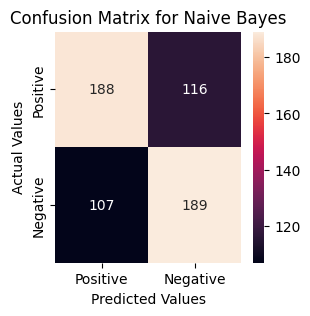

In [110]:
#Dataframe 2
nb2 = MultinomialNB()
nb2.fit(X2_train,y2_train)
y2_pred = nb2.predict(X2_test)
acc_nb2 = metrics.accuracy_score(y2_test, y2_pred)
print("DATAFRAME 2")
print("Model Accuracy :", np.round(acc_nb2*100,2),"%")
#Confusion Matrix
cm2 = confusion_matrix(y2_test, y2_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2 = pd.DataFrame(cm2,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])
#Plotting the matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True, fmt='g')
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

DATAFRAME 2
Model Accuracy : 56.17 %


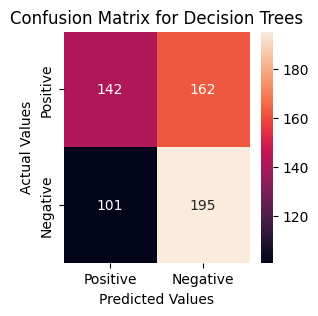

-----------------------


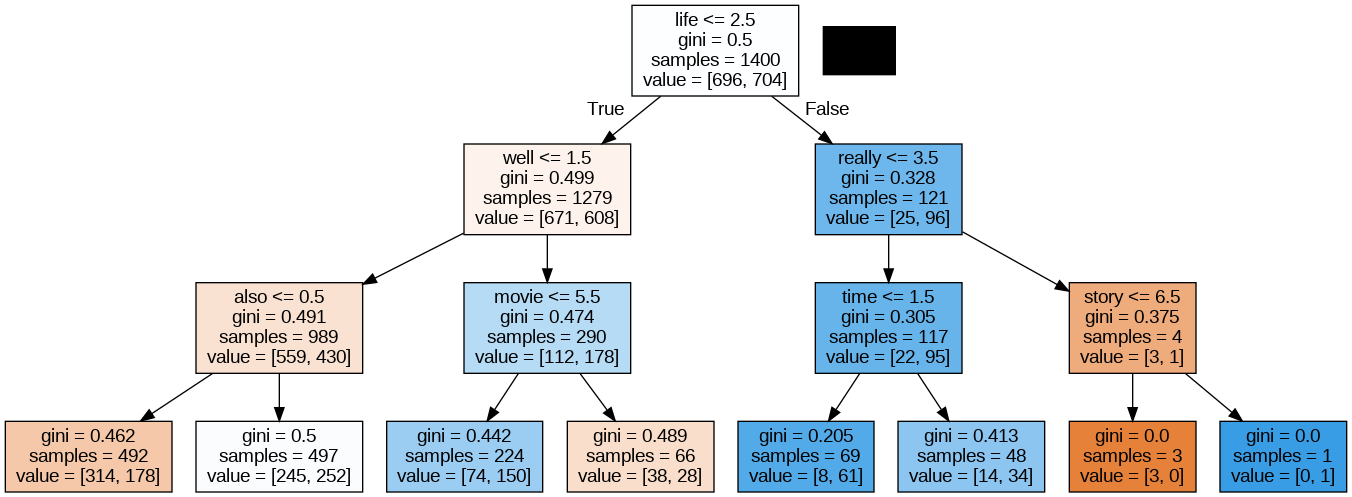

In [117]:
#Dataframe 2
tree2 = DecisionTreeClassifier(max_depth = 3)
tree2.fit(X2_train,y2_train)
y2_pred = tree2.predict(X2_test)
acc_tree2 = metrics.accuracy_score(y2_test, y2_pred)
print("DATAFRAME 2")
print("Model Accuracy :", np.round(acc_tree2*100,2),"%")
#Confusion Matrix
cm2 = confusion_matrix(y2_test, y2_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2 = pd.DataFrame(cm2,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])
#Plotting the matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True, fmt='g')
plt.title('Confusion Matrix for Decision Trees')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print("-----------------------")
#Plotting Tree1
dot_data=tree.export_graphviz(tree2, out_file=None,filled=True,feature_names=CVF.get_feature_names_out()) #filled = it will fill colors as per the conditon for the target variable = collection
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

DATAFRAME 2
Model Accuracy : 63.83 %


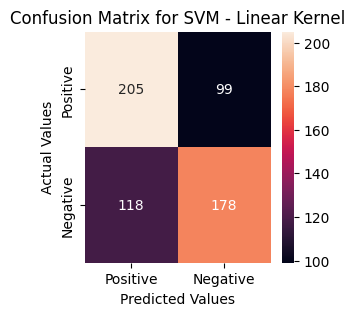




DATAFRAME 2
Model Accuracy : 52.5 %


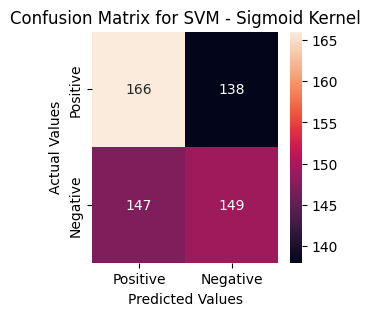




DATAFRAME 2
Model Accuracy : 64.67 %


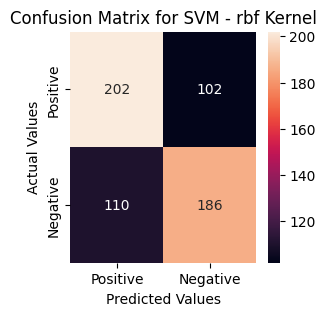

In [121]:
#Dataframe 2
SVM2a = SVC(kernel = "linear")
SVM2a.fit(X2_train,y2_train)
y2a_pred = SVM2a.predict(X2_test)
acc_SVM2a = metrics.accuracy_score(y2_test, y2a_pred)
print("DATAFRAME 2")
print("Model Accuracy :", np.round(acc_SVM2a*100,2),"%")
#Confusion Matrix
cm2a = confusion_matrix(y2_test, y2a_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2a = pd.DataFrame(cm2a,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])
#Plotting the matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm2a, annot=True, fmt='g')
plt.title('Confusion Matrix for SVM - Linear Kernel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
"-------------"
SVM2b = SVC(kernel = "sigmoid")
SVM2b.fit(X2_train,y2_train)
y2b_pred = SVM2b.predict(X2_test)
acc_SVM2b = metrics.accuracy_score(y2_test, y2b_pred)
print("\n\n")
print("DATAFRAME 2")
print("Model Accuracy :", np.round(acc_SVM2b*100,2),"%")
#Confusion Matrix
cm2b = confusion_matrix(y2_test, y2b_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2b = pd.DataFrame(cm2b,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])
#Plotting the matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm2b, annot=True, fmt='g')
plt.title('Confusion Matrix for SVM - Sigmoid Kernel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
"--------------------------------"
SVM2c = SVC(kernel = "rbf")
SVM2c.fit(X2_train,y2_train)
y2c_pred = SVM2c.predict(X2_test)
acc_SVM2c = metrics.accuracy_score(y2_test, y2c_pred)
print('\n\n')
print("DATAFRAME 2")
print("Model Accuracy :", np.round(acc_SVM2c*100,2),"%")
#Confusion Matrix
cm2c = confusion_matrix(y2_test, y2c_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2c = pd.DataFrame(cm2c,
                     index = ['Positive','Negative'], 
                     columns = ['Positive','Negative'])
#Plotting the matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm2c, annot=True, fmt='g')
plt.title('Confusion Matrix for SVM - rbf Kernel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()